In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [9]:
dataset = pd.read_csv("train.csv")

In [10]:
dataset.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [14]:
dataset.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [15]:
y = dataset['y'].values

Text(0, 0.5, '# of times')

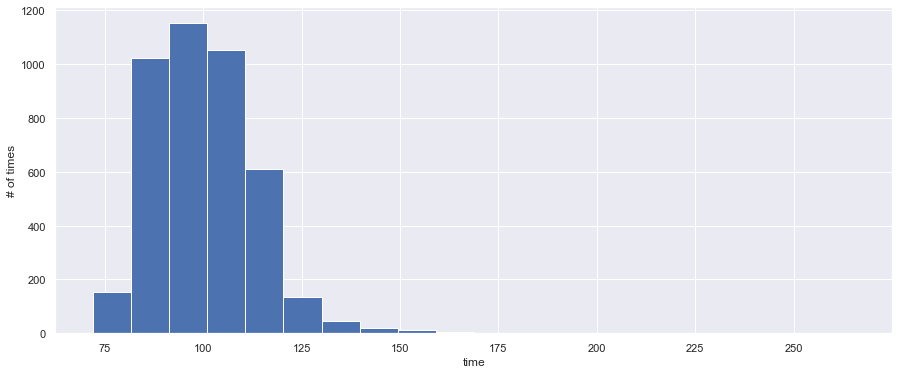

In [26]:
plt.figure(figsize=(15,6))
plt.hist(y,bins=20)
plt.xlabel('time')
plt.ylabel('# of times')

In [ ]:
dft = pd.read_csv('test.csv')

features = list(set(dataset.columns)-set(['ID','y']))

X_train = dataset[features]
y_train = dataset['y'].values

X_test = dft[features]
id_test = dft['ID'].values

for col in features:
    cardinality = len(np.unique(X_train[col]))
    
    
    if cardinality==1:
        X_train.drop(col,axis=1)
        X_test.drop(col,axis=1)
    
    
    if cardinality>2:
        mapper = lambda x: sum(ord(digit) for digit in x)
        X_train[col] = X_train[col].apply(mapper)
        X_test[col] = X_test[col].apply(mapper)

In [ ]:
from xgboost import XGBClassifier
from sklearn import xgboost as xgb

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

d_train = xgb.DMatrix(X_train,label=y_train)
d_valid = xgb.DMatrix(X_valid,label=y_valid)
d_test = xgb.DMatrix(X_test)

params = {}

params['Objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train,'Train'),(d_valid,'Validation')]

clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,
               feval=xgb_r2score,maximize=True,verbose_eval=10)

In [34]:
dataset['y'].min()

72.11

In [35]:
dataset['y'].max()

265.32

In [ ]:
p_test = clf.predict(d_test)

pred = pd.DataFrame()

pred['ID'] = id_test
pred['y'] = p_test